# Lab 1 Analysis Example using Thicket

In [27]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [28]:
tk = th.Thicket.from_caliperreader(glob("*random.cali")) # dividing it by input type for now
tk.statsframe.dataframe["time"] = 1

In [29]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 cudaMemcpy_device_to_host
│     └─ 1.000 cudaMemcpy_host_to_device
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [31]:
# Performance data
tk.dataframe

nid  \
node                                               profile           
{'name': 'main', 'type': 'function'}               140327021     1   
                                                   1152723692    1   
                                                   2187979912    1   
                                                   3547712491    1   
                                                   3707441980    1   
{'name': 'comm', 'type': 'function'}               140327021     3   
                                                   1152723692    3   
                                                   2187979912    3   
                                                   3547712491    3   
                                                   3707441980    3   
{'name': 'comm_large', 'type': 'function'}         140327021     4   
                                                   1152723692    4   
                                                   2187979912    4   
                                                   3547712491    4   
                                                   3707441980    4   
{'name': 'cudaMemcpy_device_to_host', 'type': '... 140327021     8   
                                                   1152723692    8   
                                                   2187979912    8   
                                                   3547712491    8   
                                                   3707441980    8   
{'name': 'cudaMemcpy_host_to_device', 'type': '... 140327021     5   
                                                   1152723692    5   
                                                   2187979912    5   
                                                   3547712491    5   
                                                   3707441980    5   
{'name': 'comp', 'type': 'function'}               140327021     6   
                                                   1152723692    6   
                                                   2187979912    6   
                                                   3547712491    6   
                                                   3707441980    6   
{'name': 'comp_large', 'type': 'function'}         140327021     7   
                                                   1152723692    7   
                                                   2187979912    7   
                                                   3547712491    7   
                                                   3707441980    7   
{'name': 'correctness_check', 'type': 'function'}  140327021     9   
                                                   1152723692    9   
                                                   2187979912    9   
                                                   3547712491    9   
                                                   3707441980    9   
{'name': 'data_init', 'type': 'function'}          140327021     2   
                                                   1152723692    2   
                                                   2187979912    2   
                                                   3547712491    2   
                                                   3707441980    2   

                                                                spot.channel  \
node                                               profile                     
{'name': 'main', 'type': 'function'}               140327021   regionprofile   
                                                   1152723692  regionprofile   
                                                   2187979912  regionprofile   
                                                   3547712491  regionprofile   
                                                   3707441980  regionprofile   
{'name': 'comm', 'type': 'function'}               140327021   regionprofile   
                                                   1152723692  regionprofile   
                                                   2

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [32]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source,Whole Computation Time
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
140327021,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v1048576-random.cali,1700098803,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortCUDA, 128, 1048576, random]",g,BucketSort,CUDA,int,4,1048576,random,1,128,8192,19,Handwritten,0.55
1152723692,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t2512-v1048576-random.cali,1700098802,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortCUDA, 2512, 1048576, random]",g,BucketSort,CUDA,int,4,1048576,random,1,2512,418,19,Handwritten,0.35
2187979912,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v1048576-random.cali,1700098802,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortCUDA, 256, 1048576, random]",g,BucketSort,CUDA,int,4,1048576,random,1,256,4096,19,Handwritten,0.57
3547712491,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v1048576-random.cali,1700098802,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortCUDA, 1024, 1048576, random]",g,BucketSort,CUDA,int,4,1048576,random,1,1024,1024,19,Handwritten,0.61
3707441980,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v1048576-random.cali,1700098802,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortCUDA, 64, 1048576, random]",g,BucketSort,CUDA,int,4,1048576,random,1,64,16384,19,Handwritten,0.54


In [43]:
gb = tk.groupby("InputSize")

1  thickets created...
{1048576: <thicket.thicket.Thicket object at 0x2b745e281af0>}


Compose these 3 groups column-wise to get a holistic view of the data

In [44]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [45]:
ctk.dataframe

1048576  \
                                                                   nid   
node                                               num_threads           
{'name': 'main', 'type': 'function'}               64                1   
                                                   128               1   
                                                   256               1   
                                                   1024              1   
                                                   2512              1   
{'name': 'comm', 'type': 'function'}               64                3   
                                                   128               3   
                                                   256               3   
                                                   1024              3   
                                                   2512              3   
{'name': 'comm_large', 'type': 'function'}         64                4   
                                                   128               4   
                                                   256               4   
                                                   1024              4   
                                                   2512              4   
{'name': 'cudaMemcpy_device_to_host', 'type': '... 64                8   
                                                   128               8   
                                                   256               8   
                                                   1024              8   
                                                   2512              8   
{'name': 'cudaMemcpy_host_to_device', 'type': '... 64                5   
                                                   128               5   
                                                   256               5   
                                                   1024              5   
                                                   2512              5   
{'name': 'comp', 'type': 'function'}               64                6   
                                                   128               6   
                                                   256               6   
                                                   1024              6   
                                                   2512              6   
{'name': 'comp_large', 'type': 'function'}         64                7   
                                                   128               7   
                                                   256               7   
                                                   1024              7   
                                                   2512              7   
{'name': 'correctness_check', 'type': 'function'}  64                9   
                                                   128               9   
                                                   256               9   
                                                   1024              9   
                                                   2512              9   
{'name': 'data_init', 'type': 'function'}          64                2   
                                                   128               2   
                                                   256               2   
                                                   1024              2   
                                                   2512              2   

                                                                               \
                                                                 spot.channel   
node                                               num_threads                  
{'name': 'main', 'type': 'function'}               64           regionprofile   
                                                   128          regionprofile   
                                                   256          regionprofile   
                        

Perform pandas operations to get the table in a desirable format for plotting

In [46]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (1048576, "nid"), (1048576, "spot.channel")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
ctk.dataframe

1048576                \
                                      Min time/rank Max time/rank   
name                      num_threads                               
main                      64               0.774595      0.774595   
                          128              0.618255      0.618255   
                          256              0.761927      0.761927   
                          1024             0.832434      0.832434   
                          2512             0.450149      0.450149   
comm                      64               0.001724      0.001724   
                          128              0.001508      0.001508   
                          256              0.001446      0.001446   
                          1024             0.001524      0.001524   
                          2512             0.001093      0.001093   
comm_large                64               0.001640      0.001640   
                          128              0.001447      0.001447   
                          256              0.001388      0.001388   
                          1024             0.001464      0.001464   
                          2512             0.001042      0.001042   
cudaMemcpy_device_to_host 64               0.000363      0.000363   
                          128              0.000425      0.000425   
                          256              0.000374      0.000374   
                          1024             0.000433      0.000433   
                          2512             0.000037      0.000037   
cudaMemcpy_host_to_device 64               0.001202      0.001202   
                          128              0.000978      0.000978   
                          256              0.000975      0.000975   
                          1024             0.000988      0.000988   
                          2512             0.000963      0.000963   
comp                      64               0.253706      0.253706   
                          128              0.249733      0.249733   
                          256              0.249065      0.249065   
                          1024             0.249930      0.249930   
                          2512             0.000059      0.000059   
comp_large                64               0.253634      0.253634   
                          128              0.249693      0.249693   
                          256              0.249030      0.249030   
                          1024             0.249891      0.249891   
                          2512             0.000031      0.000031   
correctness_check         64               0.002981      0.002981   
                          128              0.002971      0.002971   
                          256              0.002960      0.002960   
                          1024             0.002975      0.002975   
                          2512             0.003148      0.003148   
data_init                 64               0.022017      0.022017   
                          128              0.022264      0.022264   
                          256              0.021755      0.021755   
                          1024             0.021995      0.021995   
                          2512             0.022047      0.022047   

                                                                \
                                      Avg time/rank Total time   
name                      num_threads                            
main                      64               0.774595   0.774595   
                          128              0.618255   0.618255   
                          256              0.761927   0.761927   
                          1024             0.832434   0.832434   
                          2512             0.450149   0.450149   
comm                      64               0.001724   0.001724   
                          128              0.001508   0.001508   
                          256              0.001446   0.001446   
     

In [55]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
processes = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
print(processes)
array_sizes = [65536, 262144, 1048576] # append as necessary
print(array_sizes)

{'main', 'comp_large', 'cudaMemcpy_device_to_host', 'cudaMemcpy_host_to_device', 'comm', 'correctness_check', 'data_init', 'comm_large', 'comp'}
[64, 128, 256, 1024, 2512]
[65536, 262144, 1048576]


In [56]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    
    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Min GPU time/rank", "Max GPU time/rank", "Avg GPU time/rank"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    plt.show()
    return fig, ax

In [57]:
print(ctk.dataframe.loc["main"][1048576])

             Min time/rank  Max time/rank  Avg time/rank  Total time  \
num_threads                                                            
64                0.774595       0.774595       0.774595    0.774595   
128               0.618255       0.618255       0.618255    0.618255   
256               0.761927       0.761927       0.761927    0.761927   
1024              0.832434       0.832434       0.832434    0.832434   
2512              0.450149       0.450149       0.450149    0.450149   

             Avg GPU time/rank  Min GPU time/rank  Max GPU time/rank  \
num_threads                                                            
64                    0.001333           0.001333           0.001333   
128                   0.001194           0.001194           0.001194   
256                   0.001144           0.001144           0.001144   
1024                  0.001209           0.001209           0.001209   
2512                  0.000767           0.000767           0.0

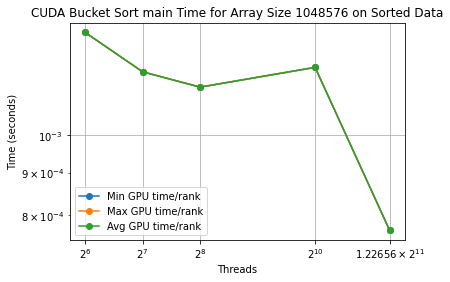

(<Figure size 432x288 with 1 Axes>,
 <Axes: title={'center': 'CUDA Bucket Sort main Time for Array Size 1048576 on Sorted Data'}, xlabel='Threads', ylabel='Time (seconds)'>)

In [60]:
name = "main"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][arraySize]["Min GPU time/rank"],
        ctk.dataframe.loc[name][arraySize]["Max GPU time/rank"],
        ctk.dataframe.loc[name][arraySize]["Avg GPU time/rank"]
        ], 
    title="CUDA Bucket Sort {} Time for Array Size {} on Sorted Data".format(name, arraySize),
    xlabel="Threads",
    ylabel="Time (seconds)",
)